In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import acquire
from sklearn import preprocessing
import scipy as sp 

%matplotlib inline
import matplotlib.pyplot as plt

plt.rc('figure', figsize=(14,8))
plt.rc('font', size=15)

import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

## Classification Exercises: Acquire Data

### Use a python module (pydata or seaborn datasets) containing datasets as a source from the iris data. Create a pandas dataframe, df_iris, from this data.

In [2]:
df_iris = sns.load_dataset('iris')

print the first 3 rows

In [3]:
df_iris.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


print the number of rows and columns (shape)

In [4]:
print(f'df_iris has {df_iris.shape[0]} rows and {df_iris.shape[1]} columns.')

df_iris has 150 rows and 5 columns.


print the column names

In [5]:
df_iris.columns.to_list()

['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

print the data type of each column

In [6]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


print the summary statistics for each of the numeric variables.

In [7]:
df_iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Would you recommend rescaling the data based on these statistics?

> No, the features have a small range, and are all pretty similar in size. 

### Read Table1_CustDetails the excel module dataset, Excel_Exercises.xlsx, into a dataframe, df_excel

In [8]:
df_excel = pd.read_excel('Spreadsheets_Exercises_Solutions.xlsx', sheet_name='Table1_CustDetails')

df_excel.head()

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,churn
0,0002-ORFBO,Female,0,Yes,Yes,1,1,1,Mailed check,65.6,593.30,No
1,0003-MKNFE,Male,0,No,No,2,1,0,Mailed check,59.9,542.40,No
2,0004-TLHLJ,Male,0,No,No,1,2,0,Electronic check,73.9,280.85,Yes
3,0011-IGKFF,Male,1,Yes,No,1,2,0,Electronic check,98.0,1237.85,Yes
4,0013-EXCHZ,Female,1,Yes,No,1,2,0,Mailed check,83.9,267.40,Yes


assign the first 100 rows to a new dataframe, df_excel_sample

In [9]:
df_excel_sample = df_excel.head(100)

print the number of rows of your original dataframe

In [10]:
df_excel.shape[0]

7049

print the first 5 column names

In [11]:
df_excel.columns.tolist()[:5]

['customer_id', 'gender', 'is_senior_citizen', 'partner', 'dependents']

print the column names that have a data type of object

In [12]:
df_excel.select_dtypes(include='object').columns.tolist()

['customer_id', 'gender', 'partner', 'dependents', 'payment_type', 'churn']

compute the range for each of the numeric variables.

In [13]:
nums = df_excel.select_dtypes(include='number')
print(nums.max() - nums.min())

is_senior_citizen       1.0
phone_service           2.0
internet_service        2.0
contract_type           2.0
monthly_charges       100.5
total_charges        8666.0
dtype: float64


### Read the data from this google sheet into a dataframe, df_google

In [14]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit#gid=341089357'
csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')

df_google = pd.read_csv(csv_export_url)

print the first 3 rows

In [15]:
df_google.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


print the number of rows and columns

In [16]:
print(f'df_google has {df_google.shape[0]} rows and {df_google.shape[1]} columns.')

df_google has 891 rows and 12 columns.


print the column names

In [17]:
df_google.columns.tolist()

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

print the data type of each column

In [18]:
df_google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


print the summary statistics for each of the numeric variables

In [19]:
df_google.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


print the unique values for each of your categorical variables

In [20]:
df_google.Name.value_counts(dropna=False)

Thayer, Mr. John Borland                          1
Moran, Mr. Daniel J                               1
Rice, Mrs. William (Margaret Norton)              1
Douglas, Mr. Walter Donald                        1
Robins, Mrs. Alexander A (Grace Charity Laury)    1
                                                 ..
Lundahl, Mr. Johan Svensson                       1
Cardeza, Mr. Thomas Drake Martinez                1
Madill, Miss. Georgette Alexandra                 1
Goldschmidt, Mr. George B                         1
Ling, Mr. Lee                                     1
Name: Name, Length: 891, dtype: int64

In [21]:
df_google.Sex.value_counts(dropna=False)

male      577
female    314
Name: Sex, dtype: int64

In [22]:
df_google.Ticket.value_counts(dropna=False)

CA. 2343             7
1601                 7
347082               7
3101295              6
347088               6
                    ..
21440                1
113788               1
349239               1
STON/O 2. 3101280    1
347063               1
Name: Ticket, Length: 681, dtype: int64

In [23]:
df_google.Cabin.value_counts(dropna=False)

NaN            687
B96 B98          4
G6               4
C23 C25 C27      4
F33              3
              ... 
B30              1
C118             1
C62 C64          1
A34              1
C32              1
Name: Cabin, Length: 148, dtype: int64

In [24]:
df_google.Embarked.value_counts(dropna=False)

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

# Data Prep Exercises

## Iris Data

### Use the function defined in acquire.py to load the iris data.

In [25]:
iris = acquire.get_iris_data()
iris.head()

,species_id,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_name
0,1,1,5.1,3.5,1.4,0.2,setosa
1,1,2,4.9,3.0,1.4,0.2,setosa
2,1,3,4.7,3.2,1.3,0.2,setosa
3,1,4,4.6,3.1,1.5,0.2,setosa
4,1,5,5.0,3.6,1.4,0.2,setosa


### Drop the species_id and measurement_id columns.

In [26]:
iris = iris.drop(columns=(['species_id', 'measurement_id']))
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species_name
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Rename the species_name column to just species.

In [27]:
iris = iris.rename(columns={'species_name': 'species'})
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Encode the species name using a sklearn label encoder. Research the inverse_transform method of the label encoder. How might this be useful?

In [28]:
le = preprocessing.LabelEncoder()
iris['species'] = le.fit_transform(iris.species)
iris.species.value_counts()

2    50
1    50
0    50
Name: species, dtype: int64

In [29]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


> inverse_transform would be useful if we wanted to use those labels as the name of the columns we encoded; or if we wanted to go back to our original data in the future.

### Create a function named prep_iris that accepts the untransformed iris data, and returns the data with the transformations above applied.

In [30]:
def ohe_encode_iris(df):
    encoded_values = sorted(list(df.species.unique()))
    le = preprocessing.LabelEncoder()
    iris_enc = le.fit_transform(df.species)
    iris_array = np.array(iris_enc).reshape(len(iris_enc), 1)
    ohe = preprocessing.OneHotEncoder(sparse=False, categories='auto')
    iris_ohe = ohe.fit_transform(iris_array)
    iris_enc = pd.DataFrame(data=iris_ohe, columns=encoded_values, index=df.index)
    iris = df.join(iris_enc)
    return df

In [31]:
def prep_iris(df):
    """
    Takes in original iris df generated by acquire.get_iris_data() and returns
    a new df with transformations.
    Drops columns ['species_id', 'measurement_id'] since they aren't useful.
    Renames ['species_name'] to 'species' 
    Encodes species column as one_hot variables
    Splits the df into 80% train set, 20% test set
    """
    
    df = df.drop(columns=['species_id', 'measurement_id'])
    df = df.rename(columns={'species_name': 'species'})
    df = ohe_encode_iris(df)
    train, test = split_my_data(df)
    return train, test

In [32]:
iris2 = acquire.get_iris_data()
train, test = acquire.prep_iris(iris2)

train.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_enc
73,6.1,2.8,4.7,1.2,versicolor,1
54,6.5,2.8,4.6,1.5,versicolor,1
134,6.1,2.6,5.6,1.4,virginica,2
1,4.9,3.0,1.4,0.2,setosa,0
56,6.3,3.3,4.7,1.6,versicolor,1


## Titanic Data

### Use the function you defined in acquire.py to load the titanic data set.

In [33]:
titanic = acquire.get_titanic_data()
titanic.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,None,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,None,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,None,Southampton,1


### Handle the missing values in the embark_town and embarked columns.

In [34]:
titanic.embark_town = titanic.embark_town.fillna('Southampton')
titanic.embarked = titanic.embarked.fillna('S')

### Remove the deck column.

In [35]:
titanic = titanic.drop(columns='deck')

### Use a label encoder to transform the embarked column.

In [36]:
encoded_values = sorted(list(titanic.embarked.unique()))
le = preprocessing.LabelEncoder()
titanic_enc = le.fit_transform(titanic.embarked)
titanic_array = np.array(titanic_enc).reshape(len(titanic_enc), 1)
ohe = preprocessing.OneHotEncoder(sparse=False, categories='auto')
titanic_ohe = ohe.fit_transform(titanic_array)
titanic_enc = pd.DataFrame(data=titanic_ohe, columns=encoded_values, index=titanic.index)
titanic = titanic.join(titanic_enc)
titanic.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,embark_town,alone,C,Q,S
0,0,0,3,male,22.0,1,0,7.2500,S,Third,Southampton,0,0.0,0.0,1.0
1,1,1,1,female,38.0,1,0,71.2833,C,First,Cherbourg,0,1.0,0.0,0.0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,Southampton,1,0.0,0.0,1.0
3,3,1,1,female,35.0,1,0,53.1000,S,First,Southampton,0,0.0,0.0,1.0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,Southampton,1,0.0,0.0,1.0


### Scale the age and fare columns using a min max scaler. Why might this be beneficial? When might you not want to do this?

In [37]:
X = titanic[['age', 'fare']]

scaler = preprocessing.MinMaxScaler(copy=True, feature_range=(0,1)).fit(X)
X = scaler.transform(X)

X = pd.DataFrame(X)
X.head()

,0,1
0,0.271174,0.014151
1,0.472229,0.139136
2,0.321438,0.015469
3,0.434531,0.103644
4,0.434531,0.015713


In [38]:
titanic['age_mm'] = X.iloc[:, :1]
titanic['fare_mm'] = X.iloc[:, 1:2]
titanic.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,embark_town,alone,C,Q,S,age_mm,fare_mm
0,0,0,3,male,22.0,1,0,7.2500,S,Third,Southampton,0,0.0,0.0,1.0,0.271174,0.014151
1,1,1,1,female,38.0,1,0,71.2833,C,First,Cherbourg,0,1.0,0.0,0.0,0.472229,0.139136
2,2,1,3,female,26.0,0,0,7.9250,S,Third,Southampton,1,0.0,0.0,1.0,0.321438,0.015469
3,3,1,1,female,35.0,1,0,53.1000,S,First,Southampton,0,0.0,0.0,1.0,0.434531,0.103644
4,4,0,3,male,35.0,0,0,8.0500,S,Third,Southampton,1,0.0,0.0,1.0,0.434531,0.015713


> The age and fare ranges are highly skewed, and scaling these columns centers the data, approximating a normal distribution. You might not want to use this when the data is a boolean, or sparse.

### Create a function named prep_titanic that accepts the untransformed titanic data, and returns the data with the transformations above applied.

In [39]:
def ohe_encode_titanic(df):
    encoded_values = sorted(list(df.embarked.unique()))
    le = preprocessing.LabelEncoder()
    titanic_enc = le.fit_transform(df.embarked)
    titanic_array = np.array(titanic_enc).reshape(len(titanic_enc), 1)
    ohe = preprocessing.OneHotEncoder(sparse=False, categories='auto')
    titanic_ohe = ohe.fit_transform(titanic_array)
    titanic_enc = pd.DataFrame(data=titanic_ohe, columns=encoded_values, index=df.index)
    df = df.join(titanic_enc)
    return df

In [40]:
def mm_scale_titanic(df):
    X = df[['age', 'fare']]
    scaler = preprocessing.MinMaxScaler(copy=True, feature_range=(0,1)).fit(X)
    X = scaler.transform(X)
    X = pd.DataFrame(X)
    df['age_mm'] = X.iloc[:, :1]
    df['fare_mm'] = X.iloc[:, 1:2]
    return df

In [41]:
def prep_titanic(df):
    """
    Takes in original titanic df generated by acquire.get_titanic_data() and returns
    a new df with transformations.
    Fills null values in embark_town and embarked with the most frequent entry: Southampton.
    Encodes embarked column as one_hot variables.
    Scales age and fare columns with min-max scaler.
    Drops columns ['species_id', 'measurement_id'] since they are obsolete.
    Splits the df into 80% train set, 20% test set
    """
    df.embark_town = df.embark_town.fillna('Southampton')
    df.embarked = df.embarked.fillna('S')
    df = ohe_encode_titanic(df)
    df = mm_scale_titanic(df)
    df = df.drop(columns=['deck', 'embarked', 'age', 'fare'])
    train, test = split_my_data(df)
    return train, test

In [42]:
titanic2 = acquire.get_titanic_data()
train_titanic, test_titanic = acquire.prep_titanic(titanic2)
train_titanic.head()

,passenger_id,survived,pclass,sex,sibsp,parch,class,embark_town,alone,C,Q,S,age_mm,fare_mm
676,676,0,3,male,0,0,Third,Southampton,1,0.0,0.0,1.0,NaN,NaN
613,613,0,3,male,0,0,Third,Queenstown,1,0.0,1.0,0.0,0.293286,0.096618
130,130,0,3,male,0,0,Third,Cherbourg,1,1.0,0.0,0.0,0.565099,0.025374
220,220,1,3,male,0,0,Third,Southampton,1,0.0,0.0,1.0,0.456374,0.025374
782,782,0,1,male,0,0,First,Southampton,1,0.0,0.0,1.0,NaN,NaN


# Exploratory Analysis Exercises

## Continue in your classification_exercises.ipynb notebook. Use the iris dataset.

### Split data into train (70%) & test (30%) samples.

In [43]:
iris_df = acquire.get_iris_data()
train, test = acquire.prep_iris(iris_df)

train.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_enc
73,6.1,2.8,4.7,1.2,versicolor,1
54,6.5,2.8,4.6,1.5,versicolor,1
134,6.1,2.6,5.6,1.4,virginica,2
1,4.9,3.0,1.4,0.2,setosa,0
56,6.3,3.3,4.7,1.6,versicolor,1


### Create a swarmplot using a melted dataframe of all your numeric variables. The x-axis is the variable name, the y-axis is the measure. Add another dimension using color to represent species. Document takeaways from this visualization.

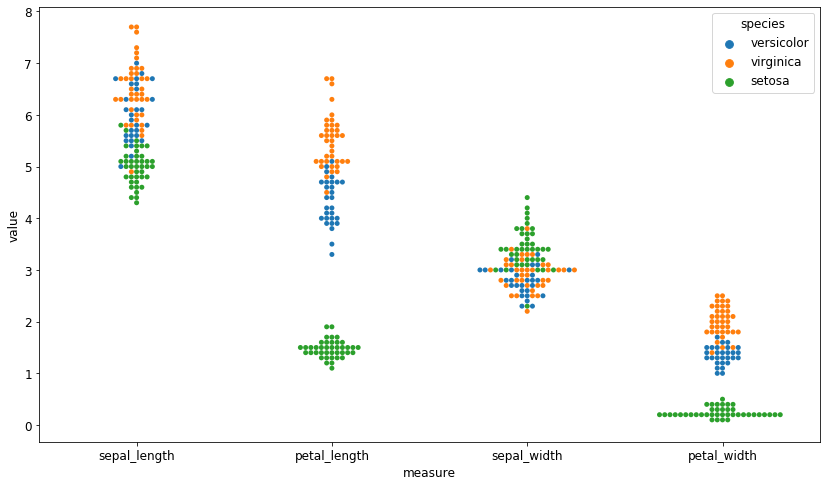

In [44]:
plt.rc('figure', figsize=(14,8))
plt.rc('font', size=12)

df_melt = pd.melt(train[['sepal_length', 'petal_length', 'sepal_width', 'petal_width', 'species']], 'species', var_name='measure')
sns.swarmplot(x='measure', y='value', hue='species', data=df_melt)
plt.show()

Takeaways:

- 

### Create 4 subplots (2 rows x 2 columns) of scatterplots

* sepal_length x sepal_width
* petal_length x petal_width
* sepal_area x petal_area
* sepal_length x petal_length

Make your figure size 14 x 8. What are your takeaways?

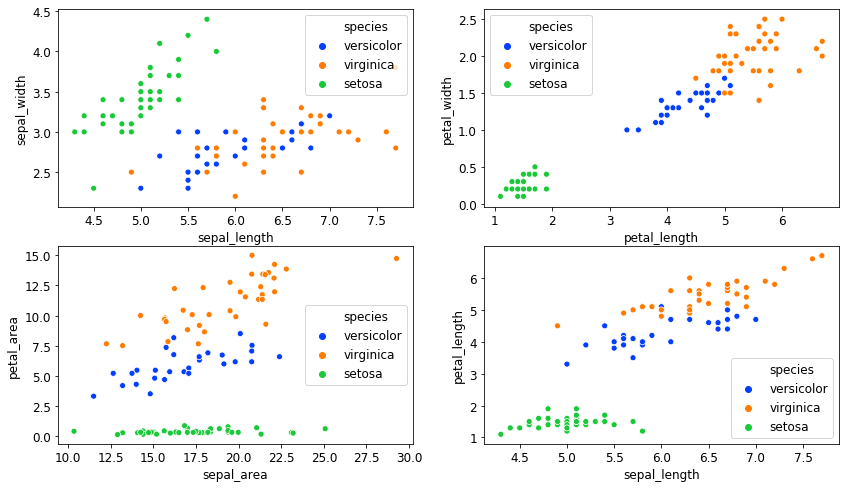

In [55]:
train['sepal_area'] = train.sepal_length * train.sepal_width
train['petal_area'] = train.petal_length * train.petal_width

plt.rc('figure', figsize=(14,8))
plt.rc('font', size=12)

sns.set_palette('bright')

fig, axes = plt.subplots(2, 2)

sns.scatterplot(train.sepal_length, train.sepal_width, ax=axes[0,0], hue=train.species)
sns.scatterplot(train.petal_length, train.petal_width, ax=axes[0,1], hue=train.species)
sns.scatterplot(train.sepal_area, train.petal_area, ax=axes[1,0], hue=train.species)
sns.scatterplot(train.sepal_length, train.petal_length, ax=axes[1,1], hue=train.species)

Takeaways:

- 

### Create a heatmap of each variable layering correlation coefficient on top.

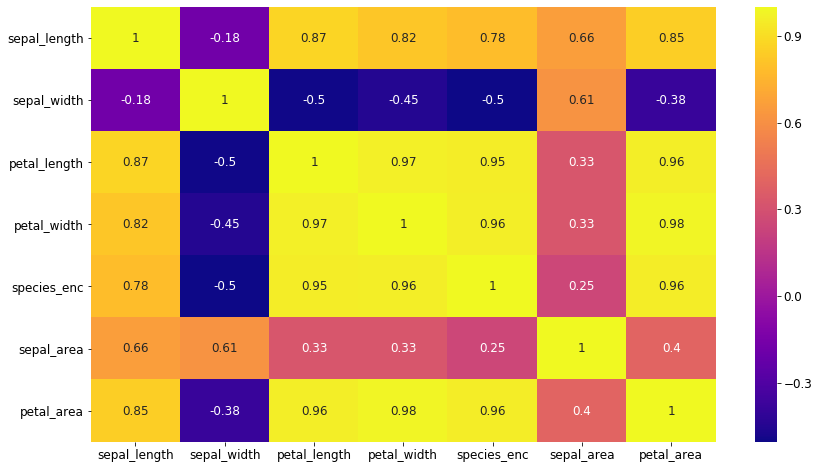

In [57]:
df_corr = train.corr()
sns.heatmap(df_corr, annot=True, cmap='plasma')

# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

### Create a scatter matrix visualizing the interaction of each variable

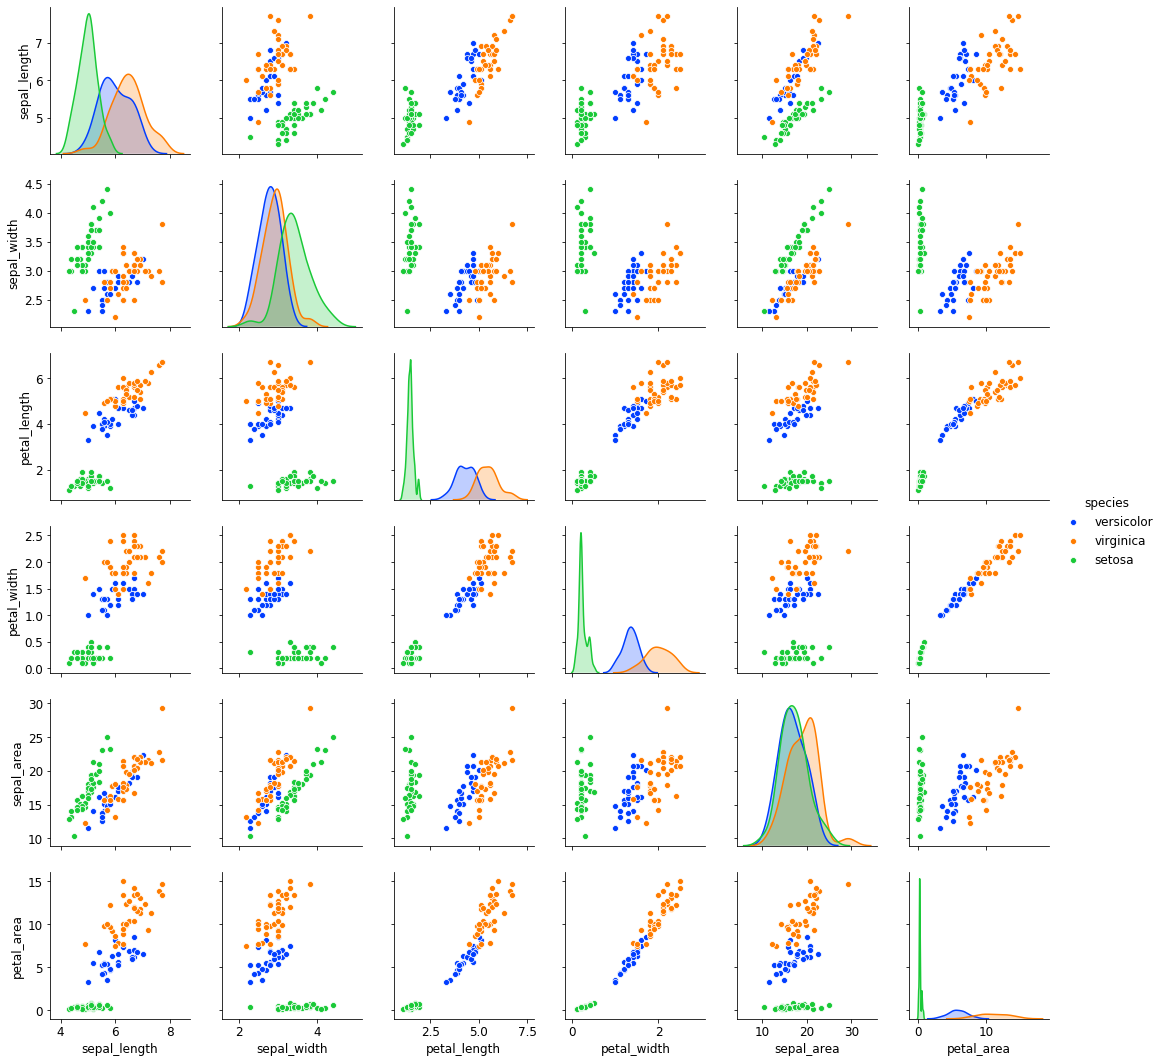

In [58]:
plt.rc('figure', figsize=(14,14))
plt.rc('font', size=12)

sns.pairplot(train.drop(columns='species_enc'), hue='species')
plt.show()

### Is the sepal length significantly different in virginica compared to versicolor? Run an experiment to test this.

* must include null hypothesis, alternative hypothesis, t-test, results, summary
    - $H_0$: the difference in sepal length between virginica and versicolor is insignificant.
    - $H_a$: the difference in sepal length between virginica and versicolor is substantial.

In [48]:
sp.stats.ttest_ind(
    train[train.species == 'virginica'].sepal_length,
    train[train.species == 'versicolor'].sepal_length)

Ttest_indResult(statistic=3.290682775656032, pvalue=0.0016397494427690198)

> We 'reject the null hypothesis' that there is no difference in sepal_length between virginica and versicolor. 